In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Transaction1.csv')
df

,Unnamed: 0,Order Id,mobile,Amount,Credit Used,Status,Transid,Operator,Date,day,month,hour,minute,year,Profit
0,0,9229923,9526140221,299.0,290.03,SUCCESS,RBR2201281632260048,Vodafone Idea,2022-01-28 16:32:40,28,1,16,32,2022,8.97
1,1,9227282,9946378150,49.0,47.53,SUCCESS,BRR2201281243220028,Vodafone Idea,2022-01-28 12:43:16,28,1,12,43,2022,1.47
2,2,9218780,8111868204,299.0,290.03,SUCCESS,RBR2201271746310079,Vodafone Idea,2022-01-27 17:46:42,27,1,17,46,2022,8.97
3,3,9203686,10236340203,229.0,222.13,SUCCESS,338548566,Sun Dth,2022-01-26 15:20:39,26,1,15,20,2022,6.87
4,4,9187282,9656272617,179.0,173.63,SUCCESS,MHR2201251118270020,Vodafone Idea,2022-01-25 11:18:01,25,1,11,18,2022,5.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,6,13893025,165160065,240.0,232.80,SUCCESS,WREC172182350JESSYJ,Videocon Dth,2023-04-20 20:24:19,20,4,20,24,2023,7.20
80,7,13851722,9446121275,319.0,309.43,SUCCESS,7580357849,Bsnl Special,2023-04-14 22:53:10,14,4,22,53,2023,9.57
81,8,13819094,9645587576,153.0,148.41,SUCCESS,7572233584,Bsnl Special,2023-04-10 15:54:03,10,4,15,54,2023,4.59
82,9,13819078,75291432450,229.0,222.13,SUCCESS,21995247MADHU,Sun Dth,2023-04-10 15:49:51,10,4,15,49,2023,6.87


In [3]:
df.isnull().sum()

Unnamed: 0     0
Order Id       0
mobile         0
Amount         0
Credit Used    0
Status         0
Transid        0
Operator       0
Date           0
day            0
month          0
hour           0
minute         0
year           0
Profit         0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
lb = LabelEncoder()

In [6]:
df['Operator'] = lb.fit_transform(df['Operator'])

In [7]:
df

,Unnamed: 0,Order Id,mobile,Amount,Credit Used,Status,Transid,Operator,Date,day,month,hour,minute,year,Profit
0,0,9229923,9526140221,299.0,290.03,SUCCESS,RBR2201281632260048,8,2022-01-28 16:32:40,28,1,16,32,2022,8.97
1,1,9227282,9946378150,49.0,47.53,SUCCESS,BRR2201281243220028,8,2022-01-28 12:43:16,28,1,12,43,2022,1.47
2,2,9218780,8111868204,299.0,290.03,SUCCESS,RBR2201271746310079,8,2022-01-27 17:46:42,27,1,17,46,2022,8.97
3,3,9203686,10236340203,229.0,222.13,SUCCESS,338548566,6,2022-01-26 15:20:39,26,1,15,20,2022,6.87
4,4,9187282,9656272617,179.0,173.63,SUCCESS,MHR2201251118270020,8,2022-01-25 11:18:01,25,1,11,18,2022,5.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,6,13893025,165160065,240.0,232.80,SUCCESS,WREC172182350JESSYJ,7,2023-04-20 20:24:19,20,4,20,24,2023,7.20
80,7,13851722,9446121275,319.0,309.43,SUCCESS,7580357849,2,2023-04-14 22:53:10,14,4,22,53,2023,9.57
81,8,13819094,9645587576,153.0,148.41,SUCCESS,7572233584,2,2023-04-10 15:54:03,10,4,15,54,2023,4.59
82,9,13819078,75291432450,229.0,222.13,SUCCESS,21995247MADHU,6,2023-04-10 15:49:51,10,4,15,49,2023,6.87


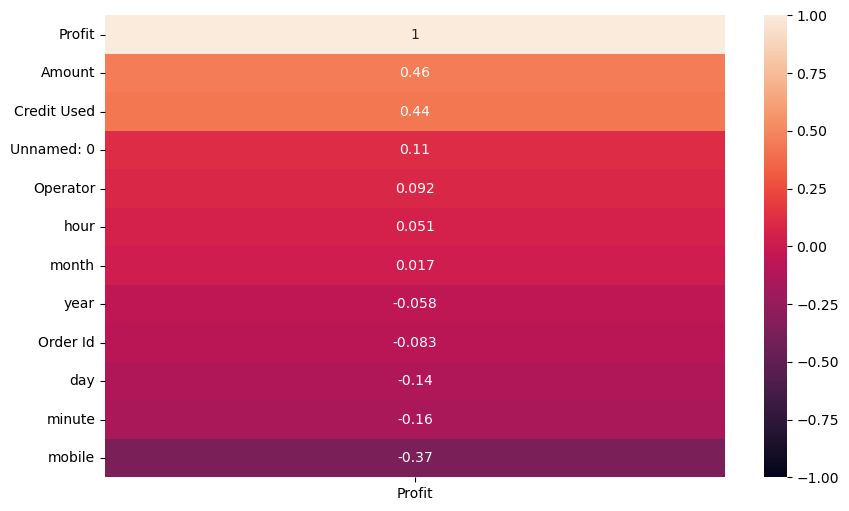

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr()[['Profit']].sort_values(by='Profit',ascending=False),vmin=-1,annot=True)
plt.show()

In [9]:
df = df[['Amount','Operator','Profit']]
df

,Amount,Operator,Profit
0,299.0,8,8.97
1,49.0,8,1.47
2,299.0,8,8.97
3,229.0,6,6.87
4,179.0,8,5.37
...,...,...,...
79,240.0,7,7.20
80,319.0,2,9.57
81,153.0,2,4.59
82,229.0,6,6.87


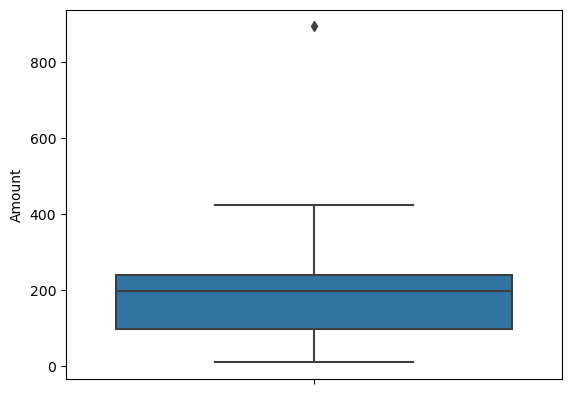

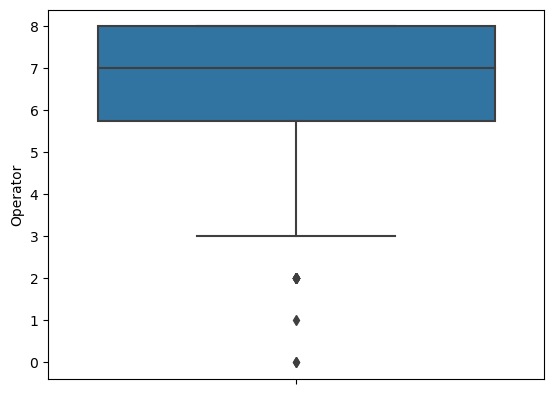

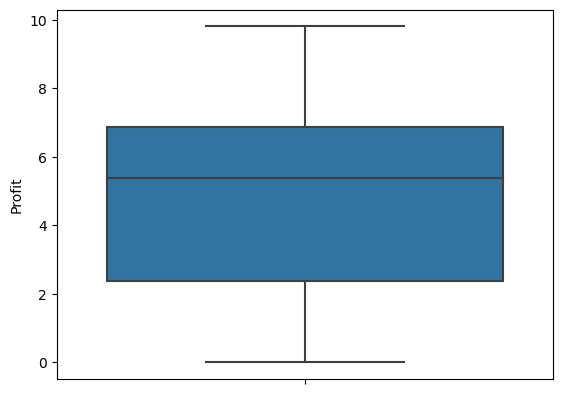

In [10]:
for i in df.columns:
    sns.boxplot(data=df,y=df[i])
    plt.show()

In [11]:
def outlier_treat(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [12]:
for i in df.columns:
    UL,LL = outlier_treat(df[i])
    df[i] = np.where((df[i]>UL) | (df[i]<LL),np.nan,df[i])

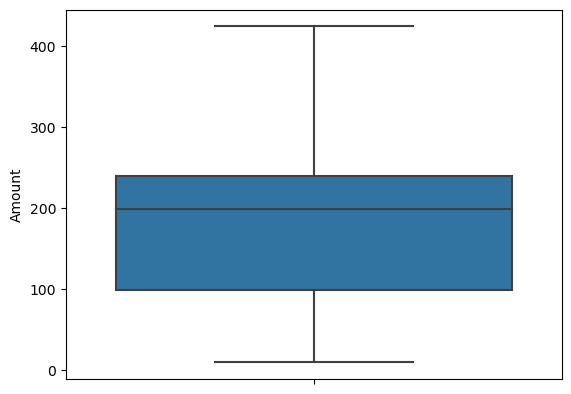

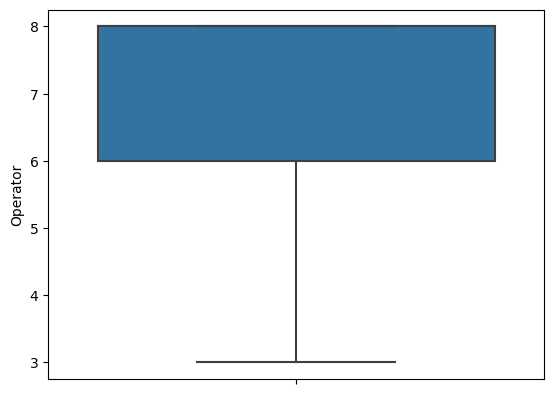

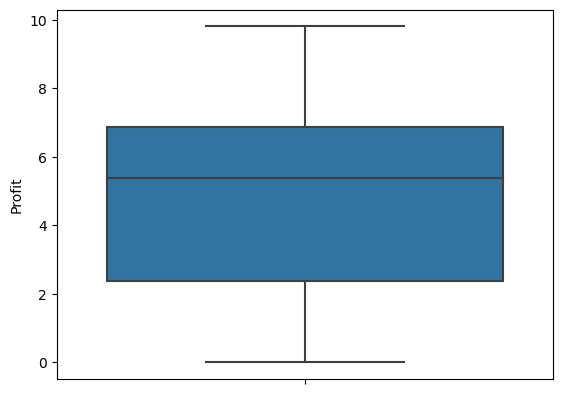

In [13]:
for i in df.columns:
    sns.boxplot(data=df,y=df[i])
    plt.show()

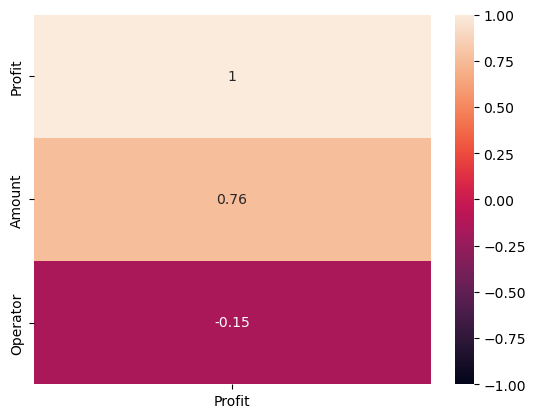

In [14]:
sns.heatmap(df.corr()[['Profit']].sort_values(by='Profit',ascending=False),vmin=-1,annot=True)
plt.show()

In [15]:
df.dropna(inplace=True)

In [16]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### splitting the data

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50,shuffle=True)

### Feature scaling

In [18]:
sc = StandardScaler()

In [19]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [78]:
x_train

array([[-1.80125313, -1.51075716],
       [ 1.26596303,  0.71491187],
       [ 0.50995905, -0.76886748],
       [ 1.56836463,  0.71491187],
       [-1.7580529 ,  0.71491187],
       [ 1.16876252, -2.99453651],
       [-0.89404835,  0.71491187],
       [ 0.50995905, -0.76886748],
       [-0.89404835,  0.71491187],
       [ 0.50995905, -0.76886748],
       [ 0.50995905, -0.76886748],
       [ 0.18595734,  0.71491187],
       [ 0.50995905, -0.76886748],
       [ 0.40195848,  0.71491187],
       [ 0.50995905, -0.76886748],
       [ 0.40195848,  0.71491187],
       [-1.11004949,  0.71491187],
       [ 0.50995905, -0.76886748],
       [ 0.08875683, -0.02697781],
       [-0.03004379,  0.71491187],
       [-1.85525341,  0.71491187],
       [-0.3540455 ,  0.71491187],
       [-0.66724715, -0.02697781],
       [ 0.18595734,  0.71491187],
       [ 2.61597015, -2.25264683],
       [-1.7580529 ,  0.71491187],
       [-1.33685068,  0.71491187],
       [-0.3540455 ,  0.71491187],
       [ 1.26596303,

In [77]:
x_test

array([[ 0.62875968, -0.02697781],
       [ 0.61795962,  0.71491187],
       [ 0.50995905, -0.76886748],
       [ 1.26596303,  0.71491187],
       [-1.11004949,  0.71491187],
       [ 0.61795962, -0.02697781],
       [-1.7580529 ,  0.71491187],
       [-0.03004379,  0.71491187],
       [-1.43405119,  0.71491187],
       [-0.03004379,  0.71491187],
       [ 0.72596019, -0.76886748],
       [ 0.18595734,  0.71491187],
       [ 1.16876252, -2.99453651],
       [ 0.72596019,  0.71491187]])

### Model building`

##### fitting the model with training data

In [20]:
model = RandomForestRegressor()

In [21]:
model.fit(x_train,y_train)

RandomForestRegressor()

### Training accuracy

In [22]:
model.score(x_train,y_train)

0.9572393012318142

### Testing accuracy

In [23]:
model.score(x_test,y_test)

0.9905124333676782

In [24]:
 y_pred = model.predict(x_test)

In [25]:
y_pred

array([7.2165, 7.1529, 6.87  , 8.9784, 2.4   , 7.1505, 0.5592, 5.3733,
       1.5426, 5.3733, 7.1235, 5.9139, 7.9206, 7.1424])

In [26]:
y_test

array([7.2 , 7.17, 6.87, 8.97, 2.37, 7.17, 0.57, 5.37, 1.47, 5.37, 7.47,
       5.97, 8.7 , 7.47])

In [27]:
r2_score(y_test,y_pred)

0.9905124333676782

In [28]:
models = {
    'LinearRegression':LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR':SVR(),
    'LinearSVR':LinearSVR(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'RandomForestRegressor': RandomForestRegressor()
}

In [29]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('model trained with{}'.format(name))
    training_score = model.score(x_train,y_train)*100
    testing_score = model.score(x_test,y_test)*100
    y_pred = model.predict(x_test)
    score = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print('Training score: ',training_score)
    print('Testing score: ', testing_score)
    print('r2_score: ',score)
    print('mean_absolute_error: ',mae)
    print('mean_squared_error: ',mse)
    print('Root_mean_squared_error: ',rmse)
    print('*'*80)

model trained withLinearRegression
Training score:  60.13922859478149
Testing score:  85.7670867760715
r2_score:  0.857670867760715
mean_absolute_error:  0.6656857611148511
mean_squared_error:  0.9057997351602015
Root_mean_squared_error:  0.951735118171123
********************************************************************************
model trained withRidge
Training score:  60.09990928954263
Testing score:  85.45548232898794
r2_score:  0.8545548232898794
mean_absolute_error:  0.6958672221067204
mean_squared_error:  0.9256306173697907
Root_mean_squared_error:  0.9620969895856606
********************************************************************************
model trained withLasso
Training score:  42.82473546431921
Testing score:  55.82403800418321
r2_score:  0.5582403800418321
mean_absolute_error:  1.5198997183018446
mean_squared_error:  2.811411412878223
Root_mean_squared_error:  1.6767263977400197
********************************************************************************
mod

In [52]:
model = GradientBoostingRegressor()

In [53]:
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [54]:
y_pred = model.predict(x_test)

### Training score

In [55]:
model.score(x_train,y_train)

0.9999958531438385

### Testing accuracy

In [56]:
model.score(x_test,y_test)

0.9990139040695472

In [87]:
OUTPUT = pd.DataFrame(zip(y_test, y_pred), columns=['ACTUAL', 'PREDICTION'], dtype=float)
OUTPUT

,ACTUAL,PREDICTION
0,7.20,7.225104
1,7.17,7.349398
2,6.87,6.869648
3,8.97,8.972593
4,2.37,2.370514
5,7.17,7.225104
6,0.57,0.571262
7,5.37,5.369995
8,1.47,1.470762
9,5.37,5.369995


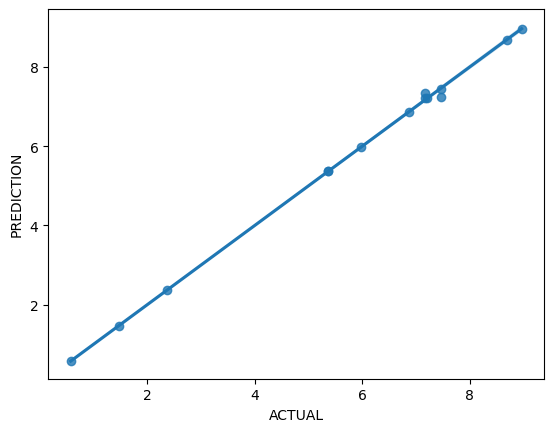

In [88]:
sns.regplot(data=OUTPUT, x='ACTUAL',  y = 'PREDICTION')
plt.show()

In [89]:
OUTPUT['ERROR'] = OUTPUT.ACTUAL- OUTPUT.PREDICTION

In [90]:
OUTPUT

,ACTUAL,PREDICTION,ERROR
0,7.20,7.225104,-0.025104
1,7.17,7.349398,-0.179398
2,6.87,6.869648,0.000352
3,8.97,8.972593,-0.002593
4,2.37,2.370514,-0.000514
5,7.17,7.225104,-0.055104
6,0.57,0.571262,-0.001262
7,5.37,5.369995,0.000005
8,1.47,1.470762,-0.000762
9,5.37,5.369995,0.000005


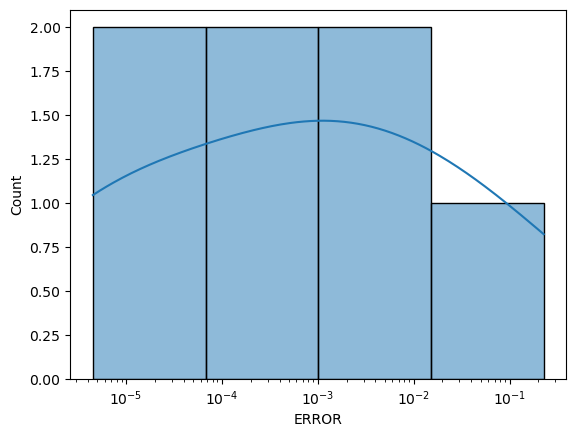

In [91]:
sns.histplot(data=OUTPUT, x= 'ERROR', kde=True,log_scale=True)
plt.show()